In [124]:
from keras.datasets import mnist
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

train_filter = np.where((train_y == 3 ) | (train_y == 7))
test_filter = np.where((test_y == 3) | (test_y == 7))

X_train, Y_train = train_X[train_filter], train_y[train_filter]
X_test, Y_test = test_X[test_filter], test_y[test_filter]

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

# Flatten 
X_train = X_train.reshape(12396, 784)
X_test = X_test.reshape(2038, 784)

# Normalize
X_train = X_train / 255
X_test = X_test / 255

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train: (12396, 28, 28)
Y_train: (12396,)
X_test:  (2038, 28, 28)
Y_test:  (2038,)
X_train: (12396, 784)
Y_train: (12396,)
X_test:  (2038, 784)
Y_test:  (2038,)


In [133]:
class Gradient:
  def __init__(self, w_init, learning_rate, iterations):
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784
    
  def train(self, X, T):
      N = len(X)
      final_y = []
      E_plot = np.array([])
      for i in range(self.iterations):
        learned_y = self.get_y(X, self.w)
        dw = self.GD(X, learned_y, T, N)
        self.w -= dw
        final_y = learned_y
        E_plot = np.append(E_plot, self.MSE(final_y, T))
      self.plot(E_plot)
      

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def plot(self, xy):
    plt.title('MSE over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('MSE value')
    plt.plot(xy)

  def GD(self, X, Y, T, N):
      total = np.array([])
      #for i , 1 ... d
      for i in range(self.dim):
          
          #subtract vector t from y
          sub = np.subtract(Y,T) # this had the error was scalar instead of vector
          #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
          gradres = np.dot(sub, X.T[i])/N
          total = np.append(total, gradres)

      return self.learning_rate * (total)

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  def get_y(self, x, w):
    self.y = np.array([])
    for x_u in x:
      #dot product of w,x^u
      wx = np.dot(w, x_u) 

      # sigmoid function on this inner product
      y_u = self.sigmoid(wx)
     
      # y is a vector over the u
      self.y = np.append(self.y, y_u)

    return(self.y)

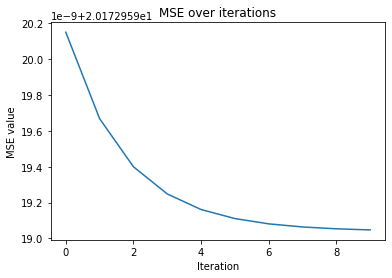

In [134]:
gradient = Gradient(np.random.uniform(size=784), 0.01, 10)
gradient.train(X_train, Y_train)

In [142]:
class Momentum:
  def __init__(self, w_init, learning_rate, iterations, momentum):
      self.momentum = momentum
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784
    
  def train(self, X, T):
      N = len(X)
      final_y = []
      dw = 0
      E_plot = np.array([])
      for i in range(self.iterations):
        learned_y = self.get_y(X, self.w)
        dw = self.GD(X, learned_y, T, N, dw)
        self.w -= dw
        final_y = learned_y  
        E_plot = np.append(E_plot, self.MSE(final_y, T))
      self.plot(E_plot)

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def plot(self, xy):
    plt.title('MSE over iterations with Momentum')
    plt.xlabel('Iteration')
    plt.ylabel('MSE value')
    plt.plot(xy)

  def GD(self, X, Y, T, N, dw = 0):
      total = np.array([])
      #for i , 1 ... d
      for i in range(self.dim):
          
          #subtract vector t from y
          sub = np.subtract(Y,T) # this had the error was scalar instead of vector
          #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
          gradres = np.dot(sub, X.T[i])/N
          total = np.append(total, gradres)

      return self.learning_rate * (total) + self.momentum * dw

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  def get_y(self, x, w):
    self.y = np.array([])
    for x_u in x:
      #dot product of w,x^u
      wx = np.dot(w, x_u) 

      # sigmoid function on this inner product
      y_u = self.sigmoid(wx)
     
      # y is a vector over the u
      self.y = np.append(self.y, y_u)

    return(self.y)

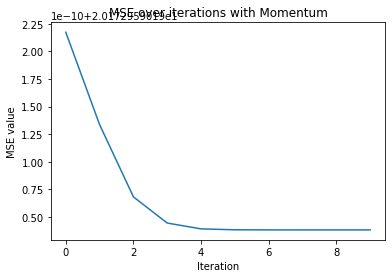

In [143]:
momentum = Momentum(np.random.uniform(size=784), 0.01, 10, 0.9)
momentum.train(X_train, Y_train)

In [177]:
class SGD:
  def __init__(self, w_init, learning_rate, iterations, batches):
      self.batches = batches
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784
    
  def train(self, X, T):
      N = self.batches
      # Hard coded
      X = np.split(X, N)
      T = np.split(T, N)
      final_y = []
      E_plot = np.array([])
      for i in range(self.iterations):
        # Batch update
        for j in range(N):

          learned_y = self.get_y(X[j], self.w)
          dw = self.GD(X[j], learned_y, T[j], N)
          self.w -= dw
          final_y = learned_y
          E_plot = np.append(E_plot, self.MSE(final_y, T))
      self.plot(E_plot)

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))
  
  def plot(self, xy):
    # Didn't manage in time to fix x axis labels to 0,10 with ticks instead of 0,120
    plt.title('MSE over iterations with SGD')
    plt.xlabel('Iteration')
    plt.ylabel('MSE value')
    plt.plot(xy)

  def GD(self, X, Y, T, N):
      total = np.array([])
      #for i , 1 ... d
      for i in range(self.dim):
          
          #subtract vector t from y
          sub = np.subtract(Y,T) # this had the error was scalar instead of vector
          #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
          gradres = np.dot(sub, X.T[i])/N
          total = np.append(total, gradres)

      return self.learning_rate * (total)

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  def get_y(self, x, w):
    self.y = np.array([])
    for x_u in x:
      #dot product of w,x^u
      wx = np.dot(w, x_u) 

      # sigmoid function on this inner product
      y_u = self.sigmoid(wx)
     
      # y is a vector over the u
      self.y = np.append(self.y, y_u)

    return(self.y)

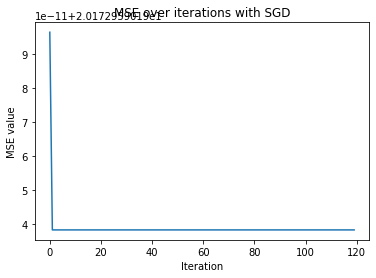

In [178]:
sgd = SGD(np.random.uniform(size=784), 0.01, 10, 12)
sgd.train(X_train, Y_train)

# Discussion: 
Discuss how the results for this problem (logisitic regression on the MNIST data) are expected to change for other data sets (more samples N or more variables n) and methods (more variables w such as deep neural networks). 

ANSWER: </br>
More samples N can never be a bad thing for logistic regression, or any model, because we use data to train and the more data the more we can train without overfitting.

More variables n would mean that we could run into problems if there are to many variables. This would be caused by the phenomenon called curse of dimensionality. The more variables the harder it is to compute.

More variables w as in deep neural network would most of the time give a better result. this however has some drawbacks such as being harder to compute, risking overfitting if regularization is not added. 